In [1]:
import praw,json
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns
import inflect
inflect = inflect.engine()

In [2]:
with open('key.json','r') as f:
    keys = json.load(f)

In [3]:
reddit = praw.Reddit(client_id=keys['client_id'],
                     client_secret=keys['client_secret'],
                     user_agent=keys['user_agent'],
                     username=keys['username'],
                     password=keys['password'])

In [4]:
submission = reddit.submission(url='https://www.reddit.com/r/AskReddit/comments/9ikj29/serious_women_of_reddit_how_old_were_you_when_you/')

In [5]:
tlc_list=[]
submission.comments.replace_more(limit=0)
for top_level_comment in submission.comments:
    tlc_list.append(top_level_comment.body)

In [6]:
tlc_df=pd.DataFrame(tlc_list)

In [7]:
tlc_df

,0
0,Maybe 13? 17 was the first time I'm certain it...
1,"About 10, a doctor decided to grope my chest t..."
2,I was in kindergarten. The gym teacher made a ...
3,Thirteen. There was a 19 year old at a camp I ...
4,Nine when one of my moms ex-boyfriends use to ...
5,I was 8. My mother took me to her new boyfrien...
6,The fact that none of the answers are over 15 ...
7,10ish? Guy in his late fifties or so felt me u...
8,12 or 13. I remember some guys from the upper ...
9,About 12. I developed early and would have gro...


In [8]:
for cmnt in tlc_df[0]:
    print(cmnt,'\n-----------------------\n\n')

Maybe 13? 17 was the first time I'm certain it was sexual, the guy when I was 13 had some sort of mental disability so I'm not sure if he was bekng sexual or just plain weird. 
-----------------------


About 10, a doctor decided to grope my chest to predict ‘how close to puberty’ I was. I had gone in for an earache, so totally unrelated. My mom and I were both horrified and froze up, then left as quickly as possible and never went back. My mom felt horrible for not knowing what to do, but we had a long talk about it afterwards, I wouldn’t have known what to do if I were in her position either. 

Edit: Wow, definitely did not expect this comment to get so much attention. I just want to clear a few things up:

This was not my normal doctor (or even a pediatrician). I had some issues with my ears as a kid so when the earache persisted, my mom took me to the nearest QuickCare clinic, NOT my normal doctor. We were very clear with this doctor that I had just received my yearly checkup (abou

In [9]:
df=np.array([6,9,10,8,13,17,9,10,13,12,13,12,9,9,12,13,9,3,9,12,10,9,12,6,12,11,10,5,11,11,15,
             11,11,8,11,9,8,11,11,11,11,11,12,12,7,12,12,6,11,12,10,11,10,10,11,12,14,11,11,6,
             15,7,7,15,10,10,10,7,12,11,10,10,13,7,14,7,13,13,11,13,12,13,10,15,4,13,12,12,4,
             12,15,9,13,11,9,13,8,12,10,12,15,10,14,15,14,11,9,4,7,4,12,14,8,12,4.5,12,14,10,
             13,7,13,10,11,11.5,7,12,13,17,8])
len(df)

129

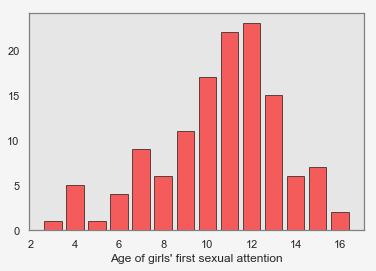

In [10]:
sns.set_style('white', {'axes.facecolor':'.90','axes.edgecolor':'.5','figure.facecolor':'.96',
                        'patch.force_edgecolor':True,'patch.edgecolor':'0'})
sns.set_context('notebook')
sns.distplot(df,axlabel='Age of girls\' first sexual attention',
             bins=np.arange(df.min(), df.max() + 1),
             kde=False,kde_kws={'color':'k','lw':1.5},
             hist_kws={'color':'r','rwidth':0.8,'alpha':0.6,
                       'align':'left',}
            )

In [11]:
np.mean(df)

10.612403100775193

In [12]:
np.std(df)

2.783005116941149